In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
import sklearn.preprocessing 
import h5py
from load_matlab_timedata import get_data_from

In [8]:
data = get_data_from('DC_motor_simulation/res.mat')

<KeysViewHDF5 ['ans']>


In [3]:
time, x, y = data[:,0], data[:,1], data[:,2]

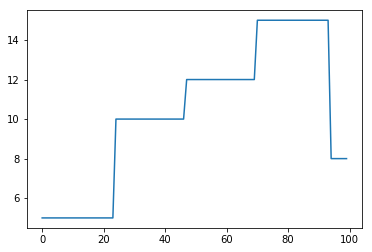

In [4]:
plt.plot(x[:100])

In [5]:
test_part = 0.3
num_datapoints = time.shape[0]

In [63]:
x_normalized, x_norms = sklearn.preprocessing.normalize(x.reshape(-1,1),
                                                  axis = 0,
                                                  norm = 'max',
                                                  return_norm = True)
y_normalized, y_norms = sklearn.preprocessing.normalize(y.reshape(-1,1),
                                                  axis = 0,
                                                  norm = 'max', 
                                                  return_norm = True)

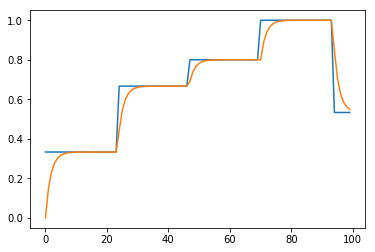

In [64]:
plt.plot(x_norm[:100])
plt.plot(y_norm[:100])


In [66]:
train_x = x_normalized[:int( - num_datapoints * test_part)]
train_y = y_normalized[:int( - num_datapoints * test_part)]
test_x = x_normalized[int( - num_datapoints * test_part):]
test_y = y_normalized[int( - num_datapoints * test_part):]

In [67]:
model3=sm.tsa.ARIMA(endog=train_y,exog=train_x,order=[3,0,1])
results3=model3.fit()
print(results3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2334
Model:                     ARMA(3, 1)   Log Likelihood                5549.416
Method:                       css-mle   S.D. of innovations              0.022
Date:                Fri, 05 Apr 2019   AIC                         -11084.831
Time:                        11:06:15   BIC                         -11044.544
Sample:                             0   HQIC                        -11070.154
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6675      0.035     19.117      0.000       0.599       0.736
x1            -0.0191      0.006     -2.963      0.003      -0.032      -0.006
ar.L1.y        1.4584      0.125     11.706      0.0

In [68]:
pred = results3.predict(start = 0, end=test_x.size, exog=test_x)

In [69]:
pred.shape

(1001,)

In [70]:
scale_window = (0, test_x.size // 10)

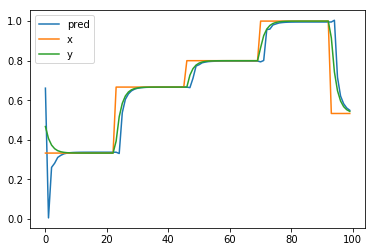

In [71]:
plt.plot(pred[scale_window[0]:scale_window[1]], label='pred')
plt.plot(test_x[scale_window[0]:scale_window[1]],  label='x')
plt.plot(test_y[scale_window[0]:scale_window[1]],  label='y')
plt.legend()

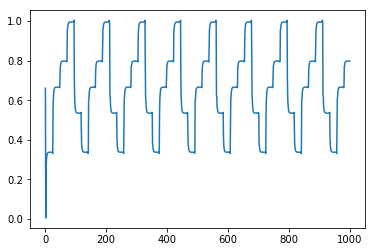

In [72]:
plt.plot(pred)

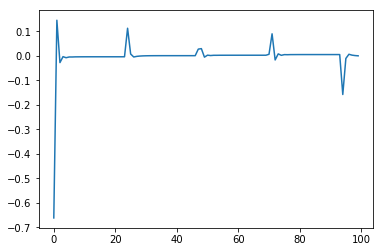

In [73]:
plt.plot(results3.resid[scale_window[0]: scale_window[1]])